In [75]:
import pandas as pd
import sys
sys.path.insert(0, '../')
from utilities.utils import Utils
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from plotManager import plotManager

In [76]:
data_path = Utils.load_config("PREPROCESSED_DATASET_PATH")

df = pd.read_csv(data_path, index_col='instant', parse_dates=False)
df.drop('date',axis=1,inplace=True)
df.head()

,year,workingday,temp,humidity,windspeed,rentals,season_1,season_2,season_3,season_4,...,hour_21,hour_22,hour_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0.226,0.793,0.0,16,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.206,0.783,0.0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.206,0.783,0.0,32,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.226,0.728,0.0,13,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0.226,0.728,0.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Building the MLP Model for prediction

In [77]:
predictors = ['year','workingday','temp','humidity','windspeed','season_1','season_2','season_3','season_4',
              'month_1','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10',
              'month_11','month_12','weather_1','weather_2','weather_3','weather_4','hour_0','hour_1','hour_2',
              'hour_3','hour_4','hour_5','hour_6','hour_7','hour_8','hour_9','hour_10','hour_11','hour_12','hour_13',
              'hour_14','hour_15','hour_16','hour_17','hour_18','hour_19','hour_20','hour_21','hour_22','hour_23',
              'weekday_0','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6']

y = df['rentals']
x = df[predictors]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=100, shuffle=False)
regressor = MLPRegressor(hidden_layer_sizes=(25), max_iter=1000, random_state = 0) 
regressor.fit(X_train, y_train)

C:\Users\matte\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=25, max_iter=1000, random_state=0)

In [78]:
predicted = regressor.predict(X_test)
predicted

array([ 26.91112346,   7.33723915,  11.38275089, ..., 166.50768297,
       136.55366596,  91.00230746])

In [79]:
new_df = y_test.copy()
new_df = new_df.to_frame()
new_df['predicted_rentals'] = predicted
new_df = new_df.sort_index()
new_df

,rentals,predicted_rentals
instant,,
12839,60,26.911123
12840,13,7.337239
12841,8,11.382751
12842,25,43.536551
12843,71,154.029228
...,...,...
17375,119,261.211207
17376,89,196.360931
17377,90,166.507683


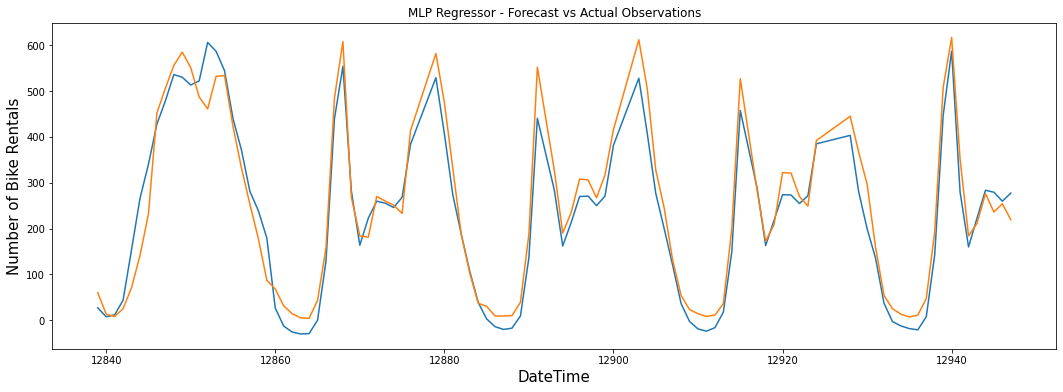

In [80]:
plotMan = plotManager(new_df)
plotMan.forecast_plot(new_df)